In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv("https://raw.githubusercontent.com/BamlakHun/Machine_Learning/refs/heads/main/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [3]:
int((len(data))*0.8)

853

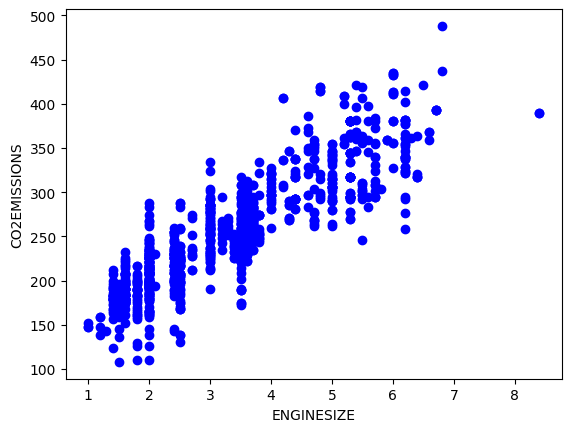

In [4]:
data = data[["ENGINESIZE","CO2EMISSIONS"]]

plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [5]:
train = data[:(int((len(data)*0.8)))] 
test = data[(int((len(data)*0.8))):]  

regr = linear_model.LinearRegression()    
train_x = np.array(train[["ENGINESIZE"]])  
train_y = np.array(train[["CO2EMISSIONS"]]) 
regr.fit(train_x,train_y) 

print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept

coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


In [6]:
regr.coef_

array([[38.79512384]])

In [7]:
(int((len(data)*0.8)))

853

Text(0, 0.5, 'Emission')

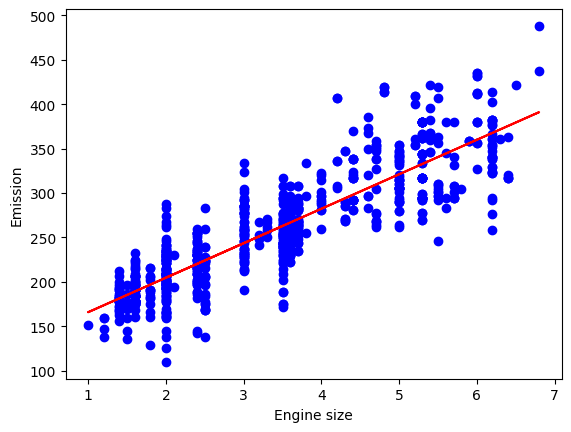

In [8]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [9]:
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350173


In [10]:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71


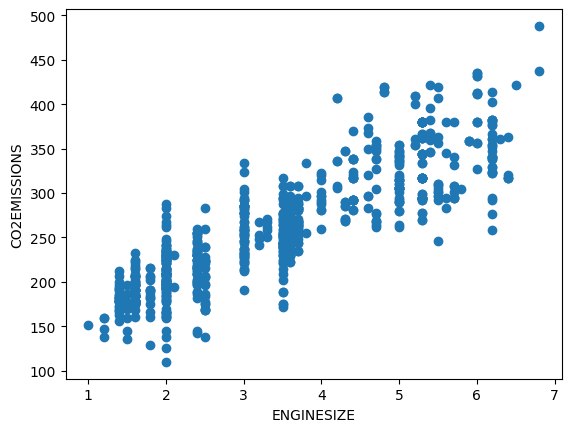

In [11]:
x = train_x
y = train_y

plt.scatter(x,y);
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [12]:
N = len(x)
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (853, 2)


In [13]:
import scipy.linalg as la

a = la.solve(X.T @ X, X.T @ y)

print(a)

print ("Intercept : ", a[0]) 
print ("coefficient : ", a[1]) 

[[127.16989951]
 [ 38.79512384]]
Intercept :  [127.16989951]
coefficient :  [38.79512384]


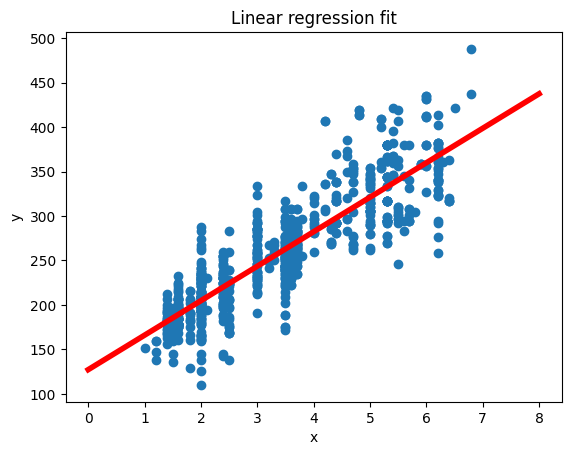

In [14]:
xs = np.linspace(0,8,25)
ys = a[0] + a[1]*xs

plt.plot(xs,ys,'r',linewidth=4)

plt.scatter(x,y);
plt.title('Linear regression fit')

plt.xlabel('x')
plt.ylabel('y')
plt.show()